Данное задание основано на материалах секции, посвященной оптимизационным задачам и методам их решения. Вам понадобится компьютер с установленным интерпретатором Python и подключенными библиотеками NumPy, SciPy и Matplotlib.

Вы научитесь:

применять библиотеку SciPy для минимизации функций
делать выбор между градиентными и неградиентными методами оптимизации, исходя из особенностей задачи и ваших пожеланий к итоговому решению

Введение

В этом задании вы научитесь решать задачи оптимизации с помощью библиотеки SciPy. Сначала вы решите задачу поиска минимума функции с помощью одного из градиентных методов оптимизации, затем увидите отличия в работе градиентного метода и одного из методов глобальной оптимизации, а в заключение – найдете глобальный минимум негладкой функции, т.е. функции, у которой не всегда определен градиент.

Понимание задачи глобальной оптимизации и отличий градиентных методов, от методов, не использующих градиент, очень полезно в задачах анализа данных, в частности, для подбора параметров алгоритмов.

Материалы

Справка по функциям пакета scipy.optimize: http://docs.scipy.org/doc/scipy/reference/optimize.html
Matplotlib User Guide: http://matplotlib.org/users/index.html
Инструкция по выполнению

Данное задание состоит из трех частей. В каждой ответом будет набор чисел, который вам нужно будет набрать через пробел в текстовом файле и загрузить. Десятичные дроби записывайте через точку.

###Задача 1. Минимизация гладкой функции

1. Рассмотрим все ту же функцию из задания по линейной алгебре: f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2), но теперь уже на промежутке [1, 30]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import math

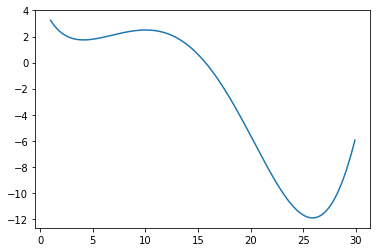

In [ ]:
f = lambda x: np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)
f_1 = f(1)
f_30 = f(30)
x = np.arange(1, 30, 0.1)
f_x = f(x)
plt.plot(x, f_x)

2. В первом задании будем искать минимум этой функции на заданном промежутке с помощью scipy.optimize. Разумеется, в дальнейшем вы будете использовать методы оптимизации для более сложных функций, а f(x) мы рассмотрим как удобный учебный пример.

3. Напишите на Питоне функцию, вычисляющую значение f(x) по известному x. Будьте внимательны: не забывайте про то, что по умолчанию в питоне целые числа делятся нацело, и о том, что функции sin и exp нужно импортировать из модуля math.

4. Изучите примеры использования scipy.optimize.minimize в документации Scipy (см. "Материалы")

5. Попробуйте найти минимум, используя стандартные параметры в функции scipy.optimize.minimize (т.е. задав только функцию и начальное приближение). Попробуйте менять начальное приближение и изучить, меняется ли результат.

In [ ]:
min_func = opt.minimize(f, 19)
min_func

      fun: -11.898894665898753
 hess_inv: array([[1.66903903]])
      jac: array([-9.89437103e-06])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 5
     njev: 8
   status: 0
  success: True
        x: array([25.88017637])

In [ ]:
min_func = opt.minimize(f, 5)
min_func

      fun: 1.745268290331984
 hess_inv: array([[6.0552088]])
      jac: array([-5.96046448e-08])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([4.13628832])

In [ ]:
x = np.random.choice(range(1, 31))
result = opt.minimize(f, x)
result

      fun: -11.89889466593321
 hess_inv: array([[1.69932345]])
      jac: array([7.51018524e-06])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 5
     njev: 7
   status: 0
  success: True
        x: array([25.88020575])

6. Укажите в scipy.optimize.minimize в качестве метода BFGS (один из самых точных в большинстве случаев градиентных методов оптимизации), запустите из начального приближения x=2. Градиент функции при этом указывать не нужно – он будет оценен численно. Полученное значение функции в точке минимума - ваш первый ответ по заданию 1, его надо записать с точностью до 2 знака после запятой.

In [ ]:
x = 2
res_2 = opt.minimize(f, x, method='BFGS')
y = round(res_2.fun, 2)
x = res_2.x.round(2)
print ('y =', y, 'x =', float(x))
res_2

y = 1.75 x = 4.14


      fun: 1.7452682903449388
 hess_inv: array([[5.98752437]])
      jac: array([-2.07126141e-06])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([4.13627618])

7. Теперь измените начальное приближение на x=30. Значение функции в точке минимума - ваш второй ответ по заданию 1, его надо записать через пробел после первого, с точностью до 2 знака после запятой.


In [ ]:
x = 30
res_2 = opt.minimize(f, x, method='BFGS')
y = round(res_2.fun, 2)
x = res_2.x.round(2)
print ('y =', y, 'x =', float(x))
res_2

y = -11.9 x = 25.88


      fun: -11.898894665981285
 hess_inv: array([[1.67932484]])
      jac: array([2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([25.88019339])

8.Стоит обдумать полученный результат. Почему ответ отличается в зависимости от начального приближения? Если нарисовать график функции (например, как это делалось в видео, где мы знакомились с Numpy, Scipy и Matplotlib), можно увидеть, в какие именно минимумы мы попали. В самом деле, градиентные методы обычно не решают задачу глобальной оптимизации, поэтому результаты работы ожидаемые и вполне корректные.

###Задача 2. Глобальная оптимизация.

1. Теперь попробуем применить к той же функции f(x) метод глобальной оптимизации — дифференциальную эволюцию.

2. Изучите документацию и примеры использования функции scipy.optimize.differential_evolution.

3. Обратите внимание, что границы значений аргументов функции представляют собой список кортежей (list, в который помещены объекты типа tuple). Даже если у вас функция одного аргумента, возьмите границы его значений в квадратные скобки, чтобы передавать в этом параметре список из одного кортежа, т.к. в реализации scipy.optimize.differential_evolution длина этого списка используется чтобы определить количество аргументов функции.

In [ ]:
x = [(1, 30)]
min_f = opt.differential_evolution(f, x)
print('y =', float(min_f.fun.round(2)))

y = -11.9


     fun: array([-11.89889467])
     jac: array([-3.55271368e-07])
 message: 'Optimization terminated successfully.'
    nfev: 96
     nit: 5
 success: True
       x: array([25.88019226])

5. Заметьте, дифференциальная эволюция справилась с задачей поиска глобального минимума на отрезке, т.к. по своему устройству она предполагает борьбу с попаданием в локальные минимумы.

6. Сравните количество итераций, потребовавшихся BFGS для нахождения минимума при хорошем начальном приближении, с количеством итераций, потребовавшихся дифференциальной эволюции. При повторных запусках дифференциальной эволюции количество итераций будет меняться, но в этом примере, скорее всего, оно всегда будет сравнимым с количеством итераций BFGS. Однако в дифференциальной эволюции за одну итерацию требуется выполнить гораздо больше действий, чем в BFGS. Например, можно обратить внимание на количество вычислений значения функции (nfev) и увидеть, что у BFGS оно значительно меньше. Кроме того, время работы дифференциальной эволюции очень быстро растет с увеличением числа аргументов функции.

In [ ]:
min_f

     fun: array([-11.89889467])
     jac: array([-3.55271368e-07])
 message: 'Optimization terminated successfully.'
    nfev: 96
     nit: 5
 success: True
       x: array([25.88019226])


nit - кол - во итераций  nfev - кол -во вычислений ф-и

###Задача 3. Минимизация негладкой функции

Теперь рассмотрим функцию h(x) = int(f(x)) на том же отрезке [1, 30], т.е. теперь каждое значение f(x) приводится к типу int и функция принимает только целые значения.

In [ ]:
def func(x):
  return int(np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2))


2. Такая функция будет негладкой и даже разрывной, а ее график будет иметь ступенчатый вид. Убедитесь в этом, построив график h(x) с помощью matplotlib.

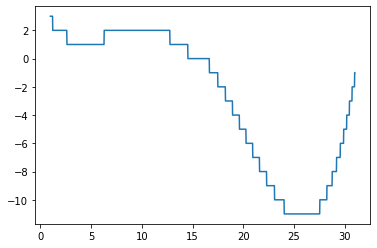

In [ ]:
x = np.arange(1, 31, 0.01)
h = np.array([func(i) for i in x])
plt.plot(x, h)


3. Попробуйте найти минимум функции h(x) с помощью BFGS, взяв в качестве начального приближения x=30. Получившееся значение функции – ваш первый ответ в этой задаче.

In [ ]:
x = 30
res_2 = opt.minimize(func, x, method='BFGS')
res_2

      fun: -5
 hess_inv: array([[1]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([30.])

wrong

4. Теперь попробуйте найти минимум h(x) на отрезке [1, 30] с помощью дифференциальной эволюции. Значение функции h(x) в точке минимума – это ваш второй ответ в этом задании. Запишите его через пробел после предыдущего.

In [ ]:
x = [(1,31)]
min_f = opt.differential_evolution(func, x)
print('y =', float(min_f.fun))
min_f


y = -11.0


     fun: -11.0
 message: 'Optimization terminated successfully.'
    nfev: 92
     nit: 5
 success: True
       x: array([25.17315295])

wrong

5. Обратите внимание на то, что полученные ответы различаются. Это ожидаемый результат, ведь BFGS использует градиент (в одномерном случае – производную) и явно не пригоден для минимизации рассмотренной нами разрывной функции. Попробуйте понять, почему минимум, найденный BFGS, именно такой (возможно в этом вам поможет выбор разных начальных приближений).


6. Выполнив это задание, вы увидели на практике, чем поиск минимума функции отличается от глобальной оптимизации, и когда может быть полезно применить вместо градиентного метода оптимизации метод, не использующий градиент. Кроме того, вы попрактиковались в использовании библиотеки SciPy для решения оптимизационных задач, и теперь знаете, насколько это просто и удобно.